# Лабораторная работа 09-11. Линейные модели: Регрессия
## Основная часть.
### Задание 1: Простая линейная регрессия.
Используйте набор данных "Boston Housing" из sklearn.datasets. Постройте модель линейной регрессии, сделайте предсказания и вычислите MSE (Mean Squared Error).

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Среднеквадратичное отклонение: 0.5559


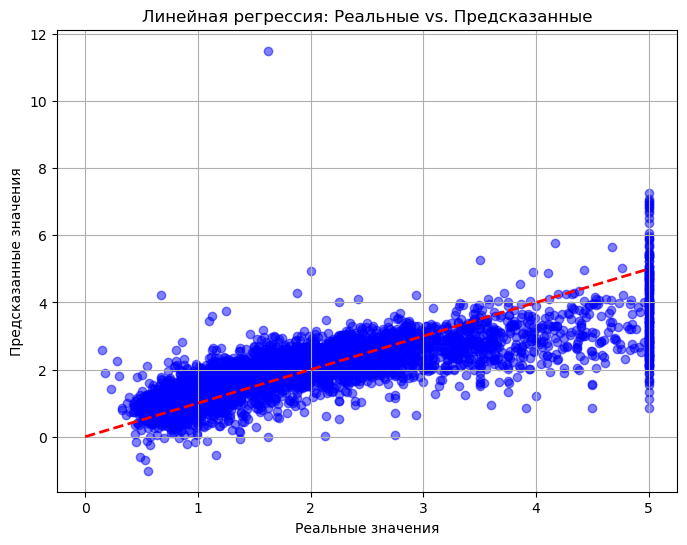

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Загружаем данные о жилье в Калифорнии
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

# Разделение на признаки и целевую переменную
X_data = data.data
y_data = data.target

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Прогнозируем на тестовых данных
predictions = lr_model.predict(X_test)

# Оценка модели: среднеквадратичная ошибка
mse_value = mean_squared_error(y_test, predictions)
print(f"Среднеквадратичное отклонение: {mse_value:.4f}")

# Визуализация результатов
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--', lw=2)  # Линия y = x для ориентира
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: Реальные vs. Предсказанные')
plt.grid(True)
plt.show()

### Задание 2: Использование кросс-валидации.
С использованием того же набора данных проведите k-fold кросс-валидацию (k=10) для своей модели и сравните среднее значения MSE на всех фолдах.

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

# Подготовка данных
X_data = data.data
y_data = data.target

# Инициализация модели линейной регрессии
model = LinearRegression()

# Настройка кросс-валидации с 10 фолдами
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

# Использование MSE как метрики для кросс-валидации
mse_metric = make_scorer(mean_squared_error)

# Кросс-валидация
mse_scores = cross_val_score(model, X_data, y_data, cv=cv_strategy, scoring=mse_metric)

# Вывод результатов
avg_mse = np.mean(mse_scores)
std_dev_mse = np.std(mse_scores)

print(f"Среднее значение MSE по кросс-валидации: {avg_mse:.4f}")
print(f"Стандартное отклонение MSE: {std_dev_mse:.4f}")

Среднее значение MSE по кросс-валидации: 0.5325
Стандартное отклонение MSE: 0.0352


### Задание 3: Построение Ridge регрессии.
Примените Ridge регрессию к набору данных "Boston Housing". Подберите гиперпараметр `alpha` через кросс-валидацию. 

Оптимальный параметр alpha для Ridge: 11.288378916846883
Среднеквадратичная ошибка для Ridge регрессии: 0.5549


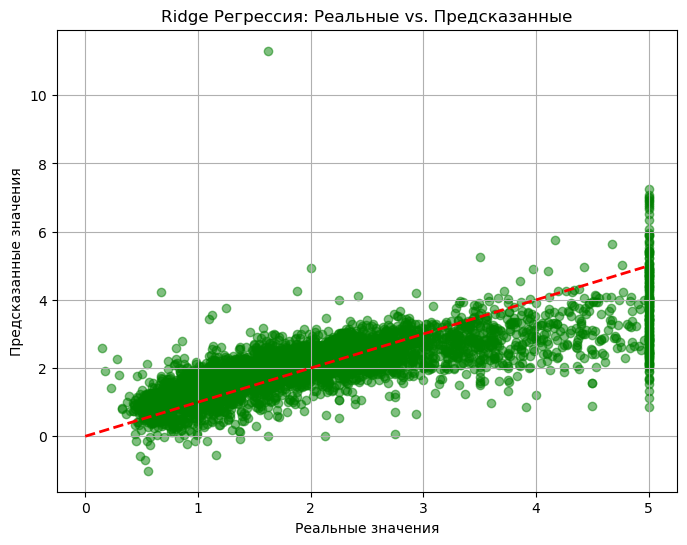

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Параметры для GridSearchCV
param_range = np.logspace(-4, 4, 20)

# Модель Ridge
ridge_model = Ridge()

# Настройка GridSearchCV с кросс-валидацией
grid_search_ridge = GridSearchCV(ridge_model, {'alpha': param_range}, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Получаем лучший параметр alpha
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print(f"Оптимальный параметр alpha для Ridge: {best_alpha_ridge}")

# Обучаем модель с лучшим параметром
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Прогнозирование и оценка
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Среднеквадратичная ошибка для Ridge регрессии: {mse_ridge:.4f}")

# Визуализация результатов
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--', lw=2)  # Линия y = x для ориентира
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Ridge Регрессия: Реальные vs. Предсказанные')
plt.grid(True)
plt.show()

### Задание 4: Построение Lasso регрессии.
Также примените Lasso регрессию к тем же данным. При подборе гиперпараметра `alpha` через кросс-валидацию сравните количество нулевых весов в модели с результатами Ridge регрессии.

Оптимальный параметр alpha для Lasso: 0.00026366508987303583
Среднеквадратичная ошибка для Lasso: 0.5553
Количество нулевых весов в модели Lasso: 0


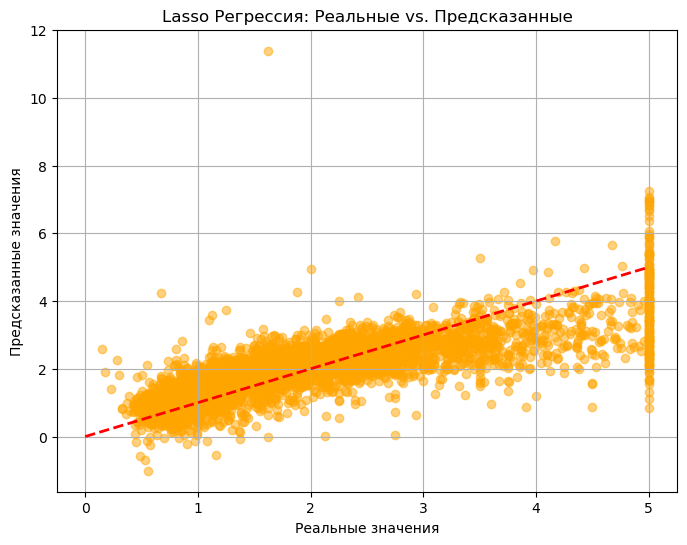

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Параметры для GridSearchCV
alpha_range = np.logspace(-4, 4, 20)

# Настройка модели Lasso
lasso_model = Lasso(max_iter=10000)

# Кросс-валидация с GridSearch
grid_search_lasso = GridSearchCV(lasso_model, {'alpha': alpha_range}, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Получение лучшего параметра alpha
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Оптимальный параметр alpha для Lasso: {best_alpha_lasso}")

# Прогнозирование и оценка
y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Среднеквадратичная ошибка для Lasso: {mse_lasso:.4f}")

# Вывод нулевых весов
lasso_zero_weights = np.sum(grid_search_lasso.best_estimator_.coef_ == 0)
print(f"Количество нулевых весов в модели Lasso: {lasso_zero_weights}")

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--', lw=2)  # Линия y = x для ориентира
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Lasso Регрессия: Реальные vs. Предсказанные')
plt.grid(True)
plt.show()

### Задание 5: Использование других функций потерь.
Используйте набор данных diabetes из sklearn.datasets и постройте модель HuberRegressor - линейную модель с функцией потерь Хьюбера, которая менее чувствительна к выбросам по сравнению с MSE.

Среднеквадратичная ошибка для Huber регрессии: 3379.3252


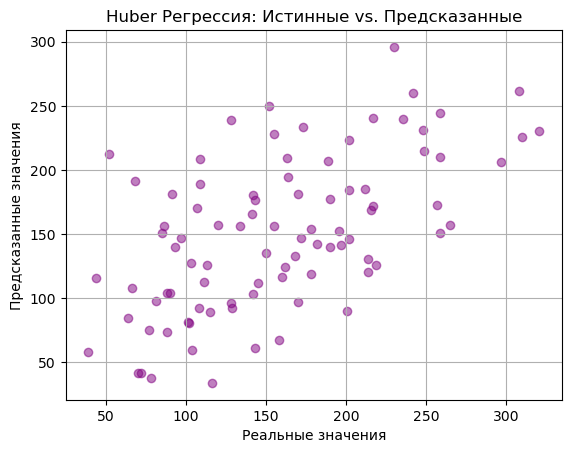

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных о диабете
diabetes_data = load_diabetes()
X_data = diabetes_data.data
y_data = diabetes_data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=38)

# Создаем и обучаем модель HuberRegressor
huber_model = HuberRegressor(max_iter=10000)
huber_model.fit(X_train, y_train)

# Прогнозируем на тестовых данных
predictions_huber = huber_model.predict(X_test)

# Рассчитываем MSE
mse_huber = mean_squared_error(y_test, predictions_huber)
print(f"Среднеквадратичная ошибка для Huber регрессии: {mse_huber:.4f}")

# Визуализация
plt.scatter(y_test, predictions_huber, color='purple', alpha=0.5)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Huber Регрессия: Истинные vs. Предсказанные')
plt.grid(True)
plt.show()

## Сравнение моделей
### Задание 6: Исследование эффекта масштабирования признаков.
Используйте любой набор данных с числовыми признаками. Тренируйте модели Ridge и Lasso регрессии на исходных данных и предобработанных данных (используйте стандартизацию и нормализацию). Сравните коэффициенты моделей, полученных для исходных и предобработанных данных.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка набора данных о диабете
diabetes_data = load_diabetes()
X_data = diabetes_data.data
y_data = diabetes_data.target

# Разделяем данные на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=38)

# Создание и обучение модели Ridge на исходных данных
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_coeffs = ridge_model.coef_

# Создание и обучение модели Lasso на исходных данных
lasso_model = Lasso(max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_coeffs = lasso_model.coef_

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение Ridge и Lasso с масштабированными данными
ridge_scaled_model = Ridge()
ridge_scaled_model.fit(X_train_scaled, y_train)
ridge_coeffs_scaled = ridge_scaled_model.coef_

lasso_scaled_model = Lasso(max_iter=10000)
lasso_scaled_model.fit(X_train_scaled, y_train)
lasso_coeffs_scaled = lasso_scaled_model.coef_

# Нормализация данных
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

# Обучение Ridge и Lasso с нормализованными данными
ridge_normalized_model = Ridge()
ridge_normalized_model.fit(X_train_normalized, y_train)
ridge_coeffs_normalized = ridge_normalized_model.coef_

lasso_normalized_model = Lasso(max_iter=10000)
lasso_normalized_model.fit(X_train_normalized, y_train)
lasso_coeffs_normalized = lasso_normalized_model.coef_

# Вывод коэффициентов
print("Коэффициенты Ridge на исходных данных:", ridge_coeffs)
print("Коэффициенты Ridge на стандартизированных данных:", ridge_coeffs_scaled)
print("Коэффициенты Ridge на нормализованных данных:", ridge_coeffs_normalized)

print("\nКоэффициенты Lasso на исходных данных:", lasso_coeffs)
print("Коэффициенты Lasso на стандартизированных данных:", lasso_coeffs_scaled)
print("Коэффициенты Lasso на нормализованных данных:", lasso_coeffs_normalized)

Коэффициенты Ridge на исходных данных: [  31.12932834  -88.32185805  300.24992365  180.98990331   19.68978353
  -22.372455   -145.44449536  118.7217466   266.54395867  132.97460679]
Коэффициенты Ridge на стандартизированных данных: [ -1.10707543 -13.2796099   26.40187989  13.77896916 -24.29051376
  13.9422718   -0.48598991   5.94411264  32.83445396   6.13386061]
Коэффициенты Ridge на нормализованных данных: [ -2.46380836 -26.31336762 133.65392753  68.82644918 -20.42910224
 -18.30385918 -50.98796009  29.48300915 127.70394502  36.57426417]

Коэффициенты Lasso на исходных данных: [  0.          -0.         424.07610186   0.           0.
   0.          -0.           0.         360.76405116   0.        ]
Коэффициенты Lasso на стандартизированных данных: [ -0.         -11.48325821  26.44450517  12.30703213  -3.89405666
  -0.          -9.89091156   0.          26.0615852    5.2538404 ]
Коэффициенты Lasso на нормализованных данных: [  0.         -14.90477153 139.6090612   48.84221884  -0.
  -0

### Задание 7: Изучение влияния регуляризации.
Выберите набор данных с высокой размерностью признаков. Создайте модели Lasso и Ridge регрессии. Проведите эксперименты с различными степенями регуляризации и установите, как они влияют на производительность модели и распределение весов признаков.

/usr/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+00, tolerance: 1.049e-02
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.307e-02, tolerance: 1.049e-02
  model = cd_fast.enet_coordinate_descent(


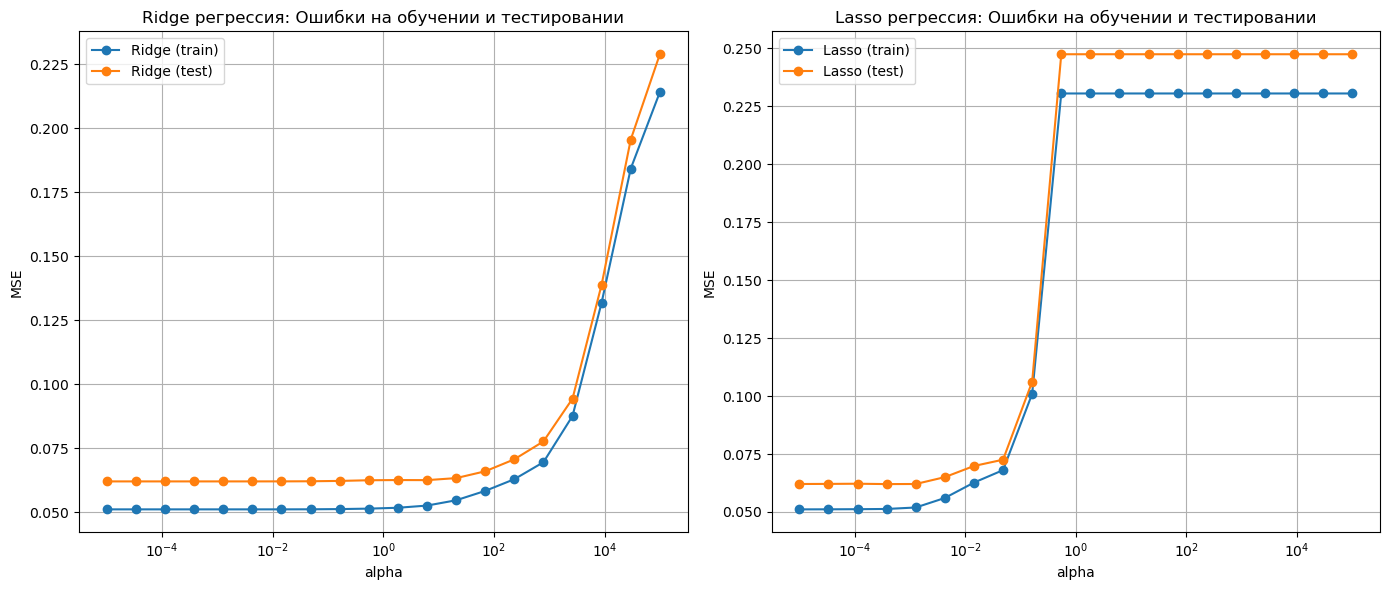

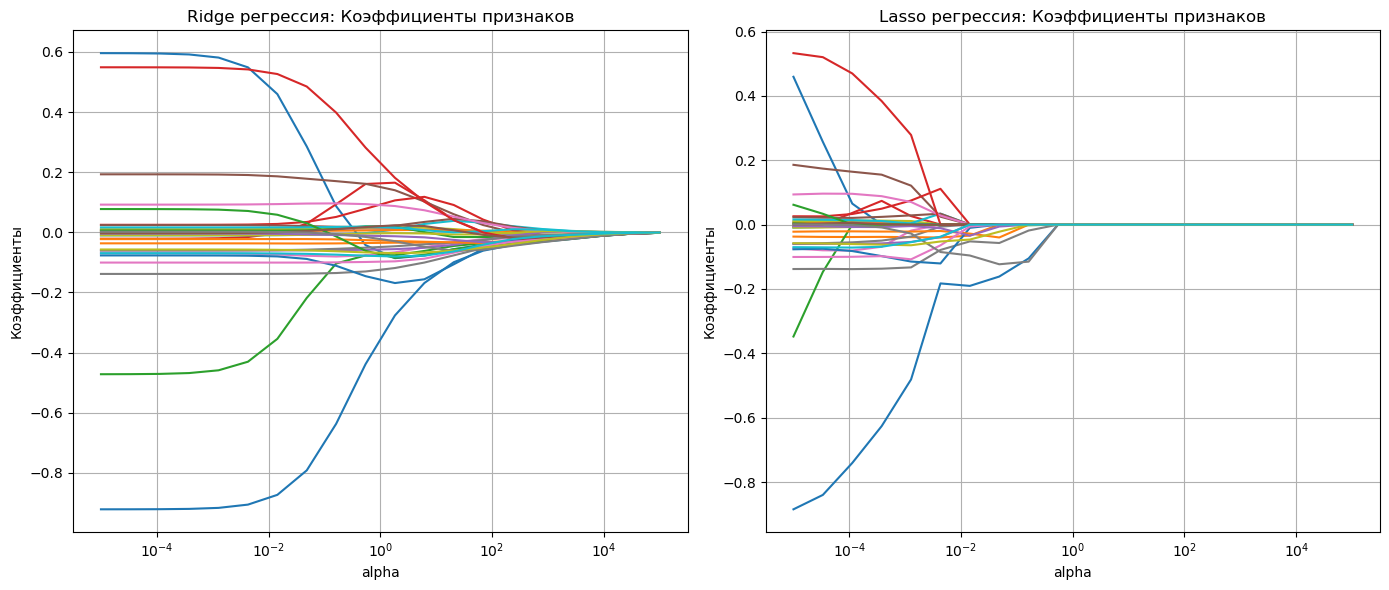

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметры для регуляризации
alpha_values = np.logspace(-5, 5, 20)

# Списки для хранения результатов
train_ridge_mse, test_ridge_mse = [], []
train_lasso_mse, test_lasso_mse = [], []
ridge_coeffs, lasso_coeffs = [], []

# Обучение моделей с разными значениями alpha
for alpha in alpha_values:
    # Ridge регрессия
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    train_ridge_mse.append(mean_squared_error(y_train, ridge_model.predict(X_train_scaled)))
    test_ridge_mse.append(mean_squared_error(y_test, ridge_model.predict(X_test_scaled)))
    ridge_coeffs.append(ridge_model.coef_)

    # Lasso регрессия
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    train_lasso_mse.append(mean_squared_error(y_train, lasso_model.predict(X_train_scaled)))
    test_lasso_mse.append(mean_squared_error(y_test, lasso_model.predict(X_test_scaled)))
    lasso_coeffs.append(lasso_model.coef_)

# Визуализация ошибок для Ridge и Lasso
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(alpha_values, train_ridge_mse, 'o-', label='Ridge (train)')
axes[0].plot(alpha_values, test_ridge_mse, 'o-', label='Ridge (test)')
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('MSE')
axes[0].set_title('Ridge регрессия: Ошибки на обучении и тестировании')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(alpha_values, train_lasso_mse, 'o-', label='Lasso (train)')
axes[1].plot(alpha_values, test_lasso_mse, 'o-', label='Lasso (test)')
axes[1].set_xscale('log')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('MSE')
axes[1].set_title('Lasso регрессия: Ошибки на обучении и тестировании')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Визуализация коэффициентов для Ridge и Lasso
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Коэффициенты Ridge
ridge_coeffs = np.array(ridge_coeffs)
for i in range(ridge_coeffs.shape[1]):
    axes[0].plot(alpha_values, ridge_coeffs[:, i], label=data.feature_names[i])

axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('Коэффициенты')
axes[0].set_title('Ridge регрессия: Коэффициенты признаков')
axes[0].grid(True)

# Коэффициенты Lasso
lasso_coeffs = np.array(lasso_coeffs)
for i in range(lasso_coeffs.shape[1]):
    axes[1].plot(alpha_values, lasso_coeffs[:, i], label=data.feature_names[i])

axes[1].set_xscale('log')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('Коэффициенты')
axes[1].set_title('Lasso регрессия: Коэффициенты признаков')
axes[1].grid(True)

plt.tight_layout()
plt.show()


### Задание 8: Регрессия с использованием метода эластичной сети.
На том же наборе данных обучите ElasticNet, который объединяет L1 и L2 регуляризацию. Экспериментируйте с разными соотношениями L1 и L2 регуляризации и установите, как это влияет на производительность модели.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметры для регуляризации
alpha_range = np.logspace(-5, 3, 20)
l1_ratios = np.linspace(0, 1, 10)

# Массивы для хранения ошибок
train_errors = np.zeros((len(alpha_range), len(l1_ratios)))
test_errors = np.zeros((len(alpha_range), len(l1_ratios)))

# Обучение ElasticNet с разными значениями alpha и l1_ratio
for idx, alpha in enumerate(alpha_range):
    for jdx, l1_ratio in enumerate(l1_ratios):
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)
        elastic_net_model.fit(X_train_scaled, y_train)
        train_errors[idx, jdx] = mean_squared_error(y_train, elastic_net_model.predict(X_train_scaled))
        test_errors[idx, jdx] = mean_squared_error(y_test, elastic_net_model.predict(X_test_scaled))

/usr/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+01, tolerance: 1.062e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+01, tolerance: 1.062e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

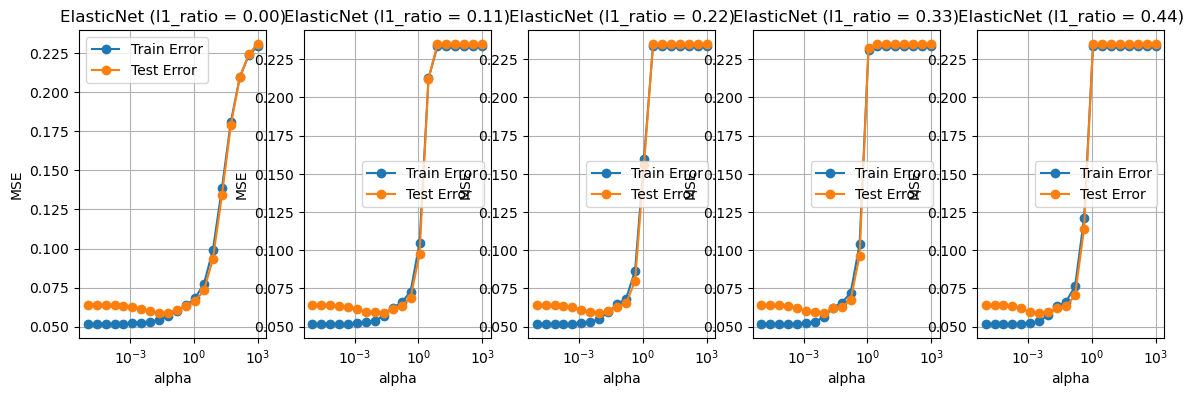

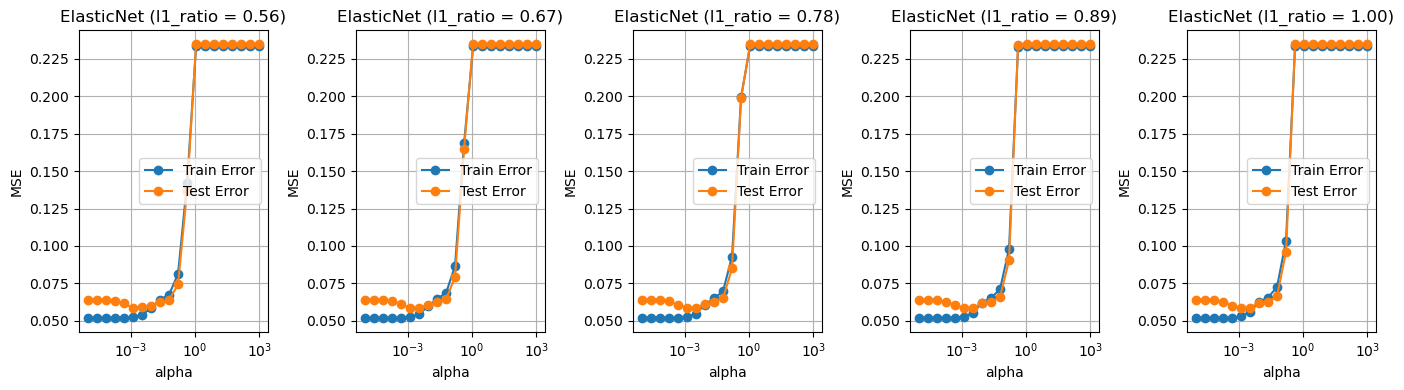

In [15]:
# Визуализация ошибок для разных значений l1_ratio
plt.figure(figsize=(14, 4))

# Графики для первых 5 значений l1_ratio
for idx, l1_ratio in enumerate(l1_ratios[:5]):
    plt.subplot(1, len(l1_ratios)-5, idx + 1)
    plt.plot(alpha_range, train_errors[:, idx], 'o-', label='Train Error')
    plt.plot(alpha_range, test_errors[:, idx], 'o-', label='Test Error')
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.title(f'ElasticNet (l1_ratio = {l1_ratio:.2f})')
    plt.legend()
    plt.grid(True)

# Графики для оставшихся значений l1_ratio
plt.figure(figsize=(14, 4))

for idx, l1_ratio in enumerate(l1_ratios[5:]):
    plt.subplot(1, len(l1_ratios)-5, idx + 1)
    plt.plot(alpha_range, train_errors[:, idx+5], 'o-', label='Train Error')
    plt.plot(alpha_range, test_errors[:, idx+5], 'o-', label='Test Error')
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.title(f'ElasticNet (l1_ratio = {l1_ratio:.2f})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Задание 9: Комбинирование методов отбора признаков и регуляризации.
Выберите подмножество признаков с помощью любого метода отбора признаков, а затем обучите модели с Lasso и Ridge регуляризацией. Сравнивай модели между собой и с моделью, построенной на всех признаках.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных о раке молочной железы
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_data = cancer_data.target

# Разделение на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=50)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели RandomForest для отбора признаков
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Отбор N наиболее важных признаков
importances = rf_model.feature_importances_
top_N = 5
top_indices = np.argsort(importances)[-top_N:]

X_train_selected = X_train_scaled[:, top_indices]
X_test_selected = X_test_scaled[:, top_indices]

# Обучение моделей Lasso и Ridge на исходных данных
lasso_all = Lasso(max_iter=10000)
lasso_all.fit(X_train_scaled, y_train)
lasso_mse_all = mean_squared_error(y_test, lasso_all.predict(X_test_scaled))

ridge_all = Ridge()
ridge_all.fit(X_train_scaled, y_train)
ridge_mse_all = mean_squared_error(y_test, ridge_all.predict(X_test_scaled))

# Обучение моделей Lasso и Ridge на отобранных признаках
lasso_selected = Lasso(max_iter=10000)
lasso_selected.fit(X_train_selected, y_train)
lasso_mse_selected = mean_squared_error(y_test, lasso_selected.predict(X_test_selected))

ridge_selected = Ridge()
ridge_selected.fit(X_train_selected, y_train)
ridge_mse_selected = mean_squared_error(y_test, ridge_selected.predict(X_test_selected))

# Вывод результатов
print(f"Lasso (только стандартизация) MSE: {lasso_mse_all:.4f}")
print(f"Ridge (только стандартизация) MSE: {ridge_mse_all:.4f}")
print(f"Lasso (+ выбранные признаки) MSE: {lasso_mse_selected:.4f}")
print(f"Ridge (+ выбранные признаки) MSE: {ridge_mse_selected:.4f}")

Lasso (только стандартизация) MSE: 0.2265
Ridge (только стандартизация) MSE: 0.0565
Lasso (+ выбранные признаки) MSE: 0.2265
Ridge (+ выбранные признаки) MSE: 0.0703


### Задание 10: Использование метрик, устойчивых к выбросам.
Используйте набор данных diabetes из sklearn. и обучите модель HuberRegressor, которая менее чувствительна к выбросам по сравнению с MSE-метрикой. Сравните эту модель с базовой моделью линейной регрессии.

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Загрузка данных о диабете
diabetes_data = load_diabetes()
X_data = diabetes_data.data
y_data = diabetes_data.target

# Разделение на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=50)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модели HuberRegressor и LinearRegression
huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)

y_pred_huber = huber_model.predict(X_test_scaled)
mse_huber = mean_squared_error(y_test, y_pred_huber)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Вывод результатов MSE
print(f"MSE для HuberRegressor: {mse_huber:.4f}")
print(f"MSE для линейной регрессии: {mse_linear:.4f}")

MSE для HuberRegressor: 2701.2446
MSE для линейной регрессии: 2650.9597
